# Whether the person should play golf or not

Here we have some data point based on that we want to predict that whether the person should play golf or not. 

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 


# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/golf-data/Data.txt


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn import preprocessing

In [7]:
df = pd.read_csv("../input/golf-data/Data.txt")
df.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,Sunny,85,85,Weak,No
1,Sunny,80,90,Strong,No
2,Overcast,83,78,Weak,Yes
3,Rain,70,96,Weak,Yes
4,Rain,68,80,Weak,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outlook   14 non-null     object
 1   Temp.     14 non-null     int64 
 2   Humidity  14 non-null     int64 
 3   Wind      14 non-null     object
 4   Decision  14 non-null     object
dtypes: int64(2), object(3)
memory usage: 688.0+ bytes


In [9]:
df.describe()

,Temp.,Humidity
count,14.000000,14.000000
mean,73.571429,80.285714
std,6.571667,9.840486
min,64.000000,65.000000
25%,69.250000,71.250000
50%,72.000000,80.000000
75%,78.750000,88.750000
max,85.000000,96.000000


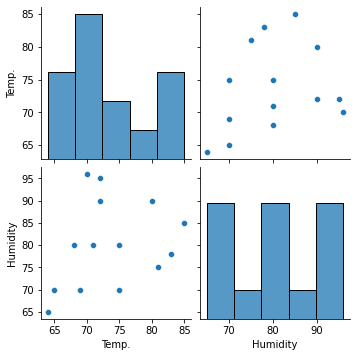

In [10]:
sns.pairplot(df)

# Label encoding

In [11]:
le = preprocessing.LabelEncoder()
 


In [12]:
for column in df.columns:
    if df[column].dtype == 'object':
        le.fit(df[column])
        encoded_feature = le.transform(df[column])
        df[column] = pd.DataFrame(encoded_feature)
        
df.head()

,Outlook,Temp.,Humidity,Wind,Decision
0,2,85,85,1,0
1,2,80,90,0,0
2,0,83,78,1,1
3,1,70,96,1,1
4,1,68,80,1,1


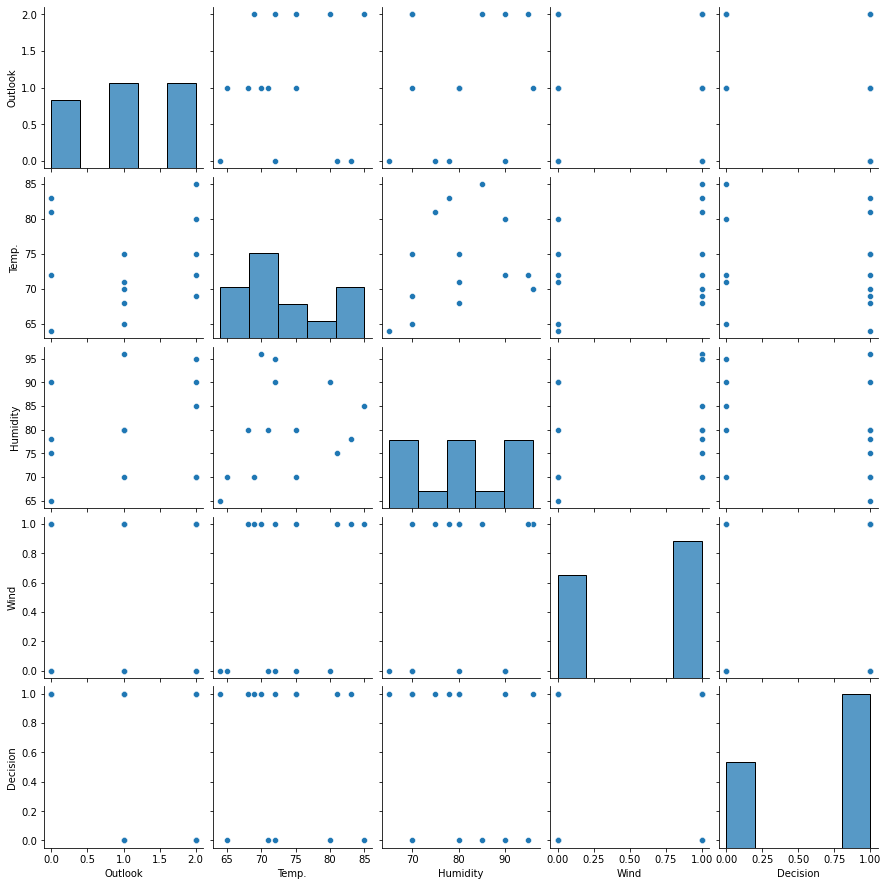

In [13]:
sns.pairplot(df)

In [14]:
y = df['Decision'].values
x = df.drop(columns = ['Decision']).values

# Modelling

In [28]:
x

array([[ 2, 85, 85,  1],
       [ 2, 80, 90,  0],
       [ 0, 83, 78,  1],
       [ 1, 70, 96,  1],
       [ 1, 68, 80,  1],
       [ 1, 65, 70,  0],
       [ 0, 64, 65,  0],
       [ 2, 72, 95,  1],
       [ 2, 69, 70,  1],
       [ 1, 75, 80,  1],
       [ 2, 75, 70,  0],
       [ 0, 72, 90,  0],
       [ 0, 81, 75,  1],
       [ 1, 71, 80,  0]])

In [15]:
lgb_train = lgb.Dataset(x, y, 
                        feature_name = ['Outlook', 'Temp', 'Humidity', 'Wind'],
                        categorical_feature = ['Outlook', 'Wind'])

In [16]:
len(df.Decision.unique())

2

In [29]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': len(df.Decision.unique()),
    'min_data':1
    
}

In [30]:
gbm_model = lgb.train(params, lgb_train, num_boost_round = 50)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 14, number of used features: 4
[LightGBM] [Info] Start training from score -1.029619
[LightGBM] [Info] Start training from score -0.441833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


In [33]:
predictions = gbm_model.predict(x)

In [34]:
index = 0
for prediction in predictions:
    if np.argmax(prediction) == 0:
        p = "No"
    else:
        p = "Yes"
    
    #-----------------
    
    a = y[index]
    if a == 0:
        a = "No"
    else:
        a = "Yes"
        
    print("Prediction is", p, "whereas actual is ", a)
    index = index + 1

Prediction is No whereas actual is  No
Prediction is No whereas actual is  No
Prediction is Yes whereas actual is  Yes
Prediction is Yes whereas actual is  Yes
Prediction is Yes whereas actual is  Yes
Prediction is No whereas actual is  No
Prediction is Yes whereas actual is  Yes
Prediction is No whereas actual is  No
Prediction is Yes whereas actual is  Yes
Prediction is Yes whereas actual is  Yes
Prediction is Yes whereas actual is  Yes
Prediction is Yes whereas actual is  Yes
Prediction is Yes whereas actual is  Yes
Prediction is No whereas actual is  No


# Interpretability


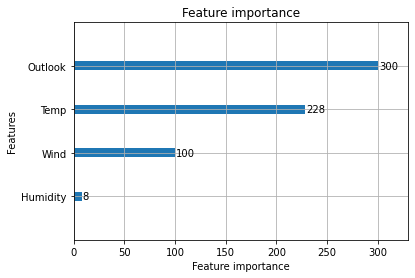

In [35]:
ax = lgb.plot_importance(gbm_model, max_num_features = 10)
plt.show()

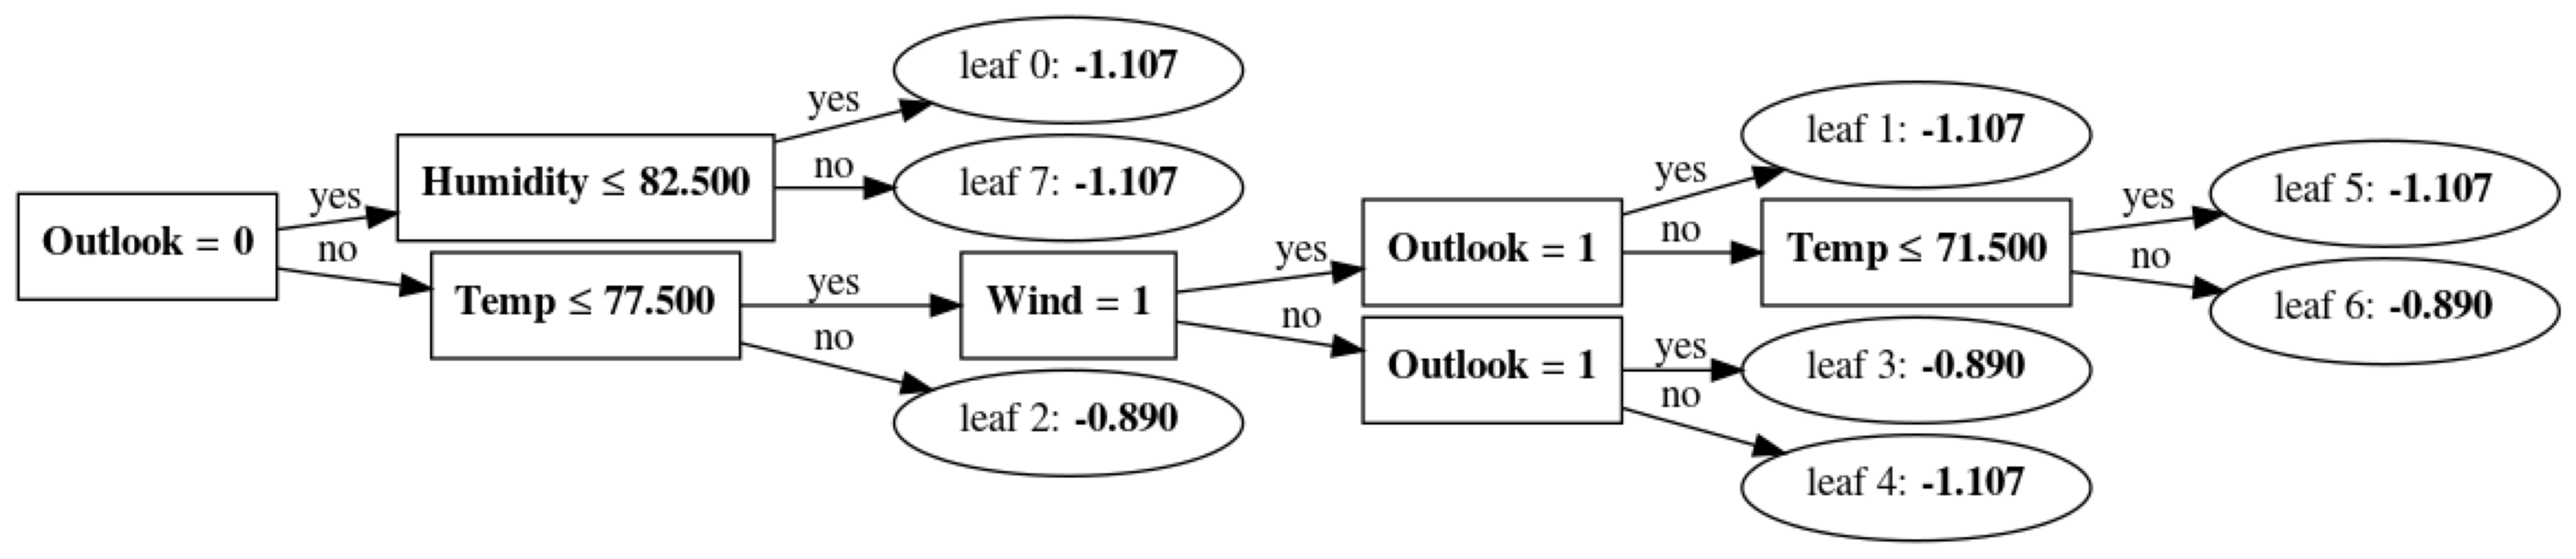

In [38]:
fig_size = [50,30]
plt.rcParams["figure.figsize"] = fig_size

ax = lgb.plot_tree(gbm_model)
plt.show()